In [5]:
import os
import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from PIL import Image

In [6]:
load_dotenv('test.env')
raw_dir = os.environ['RAW_DIR']
interim_dir = os.environ['INTERIM_DIR']

In [ ]:
raw_dir, interim_dir

In [8]:
def medianmad_norm(arr_like):
    '''
    Normalize by median and MAD

    Modified version from the function made available by the professor
    '''
    np_arr = np.array(arr_like)
    median = np.median(np_arr)
    dev = np.abs(np_arr - median)
    mad = np.median(dev)
    norm = ((np_arr - median) / mad)
    return (norm,mad)

def tanh_modified_norm(arr_like):
    np_arr = np.array(arr_like)

    mean = np.mean(np_arr)
    std = np.std(np_arr)
    print(mean,std)

    return 0.5*(np.tanh(0.01*((np_arr-mean)/std))+1)

In [9]:
original_arr = np.random.randint(0, 100, 10)
norm_arr, mad = medianmad_norm(original_arr)
print(original_arr, norm_arr, mad)

[80 49 14 81 41 33 75 77 73 61] [ 0.96296296 -1.33333333 -3.92592593  1.03703704 -1.92592593 -2.51851852
  0.59259259  0.74074074  0.44444444 -0.44444444] 13.5


In [10]:
test_path = os.path.join(raw_dir,'AVC/001_FLAIR01.bmp')
test_img  = cv.imread(test_path, cv.IMREAD_GRAYSCALE)
test_img.shape, test_img.dtype, test_img.max(), test_img.min()

((448, 448), dtype('uint8'), 254, 0)

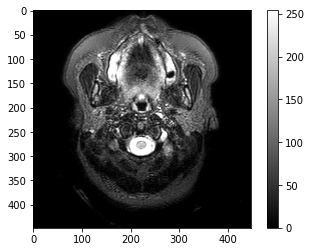

In [11]:
plt.imshow(test_img, cmap='gray')
plt.colorbar()

<BarContainer object of 20 artists>

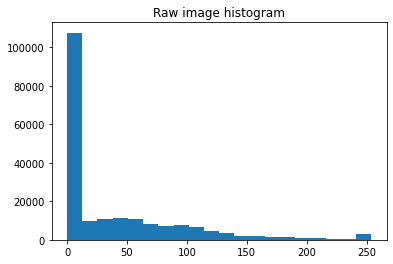

In [12]:
nbins=20
h, bin_edges = np.histogram(test_img, nbins)
w=test_img.max()/nbins
bin_centers = bin_edges[1:]-(w/2)
plt.title("Raw image histogram")
plt.bar(bin_centers, h, width=w)
# sns.distplot(test_img)


In [13]:
norm_img, mad = medianmad_norm(test_img)
norm_img.shape, norm_img.dtype, norm_img.max(), norm_img.min(), mad

((448, 448), dtype('float64'), 49.8, -1.0, 5.0)

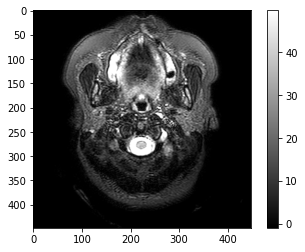

In [14]:
plt.imshow(norm_img, cmap='gray')
plt.colorbar()

<BarContainer object of 20 artists>

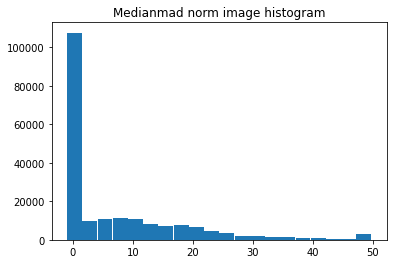

In [15]:
nbins=20
h, bin_edges = np.histogram(norm_img, nbins)
w=norm_img.max()/nbins
bin_centers = bin_edges[1:]-(w/2)
plt.title("Medianmad norm image histogram")
plt.bar(bin_centers, h, width=w)
# sns.distplot(norm_img)

In [16]:
norm_img = tanh_modified_norm(test_img)
norm_img.shape, norm_img.dtype, norm_img.max(), norm_img.min()

38.71710578762755 55.62637222390599


((448, 448), dtype('float64'), 0.519341138516456, 0.4965199527632426)

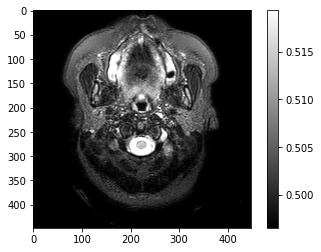

In [17]:
plt.imshow(norm_img, cmap='gray')
plt.colorbar()

<BarContainer object of 20 artists>

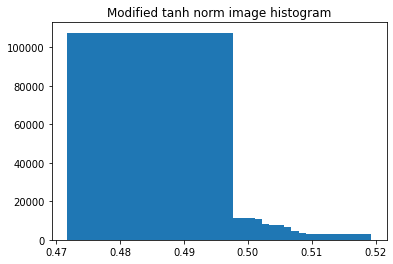

In [18]:
nbins=20
h, bin_edges = np.histogram(norm_img, nbins)
w=norm_img.max()/nbins
bin_centers = bin_edges[1:]-(w/2)
plt.title("Modified tanh norm image histogram")
plt.bar(bin_centers, h, width=w)
# sns.distplot(norm_img)

In [19]:
img_list = glob.glob(os.path.join(raw_dir,'AVC/*.bmp')) + glob.glob(os.path.join(raw_dir,'EM/*.bmp'))

In [20]:
def get_mask_path(img_path, mask_suffix='_mask.png'):
    img_wo_ext = os.path.splitext(img_path)[0]
    mask_path = img_wo_ext + mask_suffix
    return mask_path

In [ ]:
for img_path in img_list:
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    if img is None:
        continue

    mask_path = get_mask_path(img_path)
    if not os.path.exists(mask_path):
        continue

    mask = cv.imread(mask_path, cv.IMREAD_UNCHANGED)
    if mask is None:
        continue

    masked = img * (mask == mask.max())

    out_path = os.path.join(interim_dir, img_path.split(raw_dir)[1])

    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    ok = cv.imwrite(out_path, masked)
    print("write", img_path, out_path, ok)

In [24]:
with Image.open(os.path.join(raw_dir, 'AVC/051_FLAIR12_mask.png')) as f:
    test_mask = np.array(f)

test_mask.shape, test_mask.max(), test_mask.min(), test_mask.dtype

((512, 512), 254, 253, dtype('int32'))

In [25]:
test_mask = cv.imread(os.path.join(raw_dir, 'AVC/051_FLAIR12_mask.png'), cv.IMREAD_UNCHANGED)
test_mask = test_mask == test_mask.max()
test_mask.shape, test_mask.max(), test_mask.min(), test_mask.dtype

((512, 512), True, False, dtype('bool'))

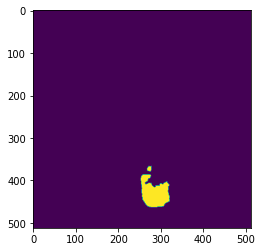

In [26]:
plt.imshow(test_mask)